# **GIAI ĐOẠN 2: TIỀN XỬ LÝ VÀ KHÁM PHÁ DỮ LIỆU**
---

## <p style="text-align: center;">**Phần 1 - Nạp các thư viện cần thiết** <a name="answer-the-question"></a></p> 

Cài đặt thêm thư viện ipynb để có thể import các variable từ các file notebook khác

In [1]:
! pip install ipynb

Thư viện thêm đường dẫn ở pha 1 vào jupyter notebook ở pha 2 để tiện lấy biến đã được tạo từ trước.

In [2]:
import sys  
sys.path.insert(0, '../phase_1_data_collection')

Các thư viện dùng để xử lý trên tập dữ liệu, trực quan dữ liệu, thao tác trên dữ liệu: 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.data_collection import df_titles_raw

pd.set_option('mode.chained_assignment', None)

---
## <p style="text-align: center;">**Phần 2 - Khám phá và tiền xử lý dữ liệu** <a name="answer-the-question"></a></p> 

### <p style="text-align: center;">**2.1 - Số hàng và cột của dữ liệu:**</p>  


Trước khi làm việc trên toàn bộ tập dữ liệu thì đầu tiên nhóm em kiểm tra số dòng và số cột ban đầu của dữ liệu đó.

Số hàng và cột của dữ liệu được lưu lần lượt vào biến `num_rows` và `num_columns`.

In [4]:
num_rows, num_cols = df_titles_raw.shape

print("Số hàng của dữ liệu titles: ", num_rows) 
print("Số cột của dữ liệu titles: ", num_cols)

Số hàng của dữ liệu titles:  19015
Số cột của dữ liệu titles:  15


### <p style="text-align: center;">**2.2 - Ý nghĩa của mỗi cột và mỗi hàng:**</p>  

Khái quát về bộ dữ liệu titles: Tittles có được từ việc gắn các bảng dữ liệu phim HBO, Amazon, Netflix với nhau. Vì vậy, nguồn gốc của Tittles chính là nguồn gốc của các bảng dữ liệu con, tất cả chúng được lấy từ trang JustWatch. Nhiệm vụ của bảng dữ liệu tittles này là thể hiện những thông tin chính của phim cũng như điểm đánh giá của chúng trên các diễn đàn chấm điểm phim uy tín trên thế giới.

Để có cái nhìn khái quát về dữ liệu thì đầu tiên, nhóm em phải xem sơ qua về 5 dòng đầu tiên cùng các thuộc tính chính của nguyên bộ dữ liệu credits:

In [5]:
df_titles_raw.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


Có khá nhiều cột (thuộc tính) trong bảng, để rõ ràng, nhóm em lấy các thuộc tính đó ra và phân tích lần lượt nó dùng để chỉ ra điều gì:

In [6]:
columns = df_titles_raw.columns
columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

- **id**: Mã số ID của phim trên JustWatch
- **title**: Tên của phim.
- **type**: Phân loại phim hay chương trình truyền hình. 
- **description**: Mô tả ngắn về phim.
- **release_year**: Năm phát hành phim.
- **age_certification**: Phân loại độ tuổi.
- **runtime**: Thời lượng của phim hay show.
- **genres**: Danh sách các thể loại.
- **production_countries**: Danh sách các quốc gia tham gia sản xuất phim.
- **seasons**: Số mùa của một show.
- **imdb_id**: Phim ID trên IMDB.
- **imdb_score**: Điểm trên IMDB.
- **imdb_votes**: Số lượt bình chọn trên IMDB.
- **tmdb_popularity**: Độ phổ biến trên TMDB.
- **tmdb_scores**: Điểm trên TMDB.

### <p style="text-align: center;">**2.3 - Về việc trùng lặp các hàng:**</p>  

Kiểm tra việc trùng lặp dữ liệu sẽ giảm thiểu được các vấn đề tiềm ẩn như là: lãng phí tài nguyên lưu trữ, bộ dữ liệu trở nên bị nhiễu, gây ra các nhầm lẫn... 

Để phân tích dữ liệu được rõ ràng và chính xác hơn, nhóm tiến hành đếm bộ dữ liệu có bao nhiêu hàng trùng lắp (lưu vào biến `num_duplicate_data`) và xóa những hàng đó đi bằng các hàm của pandas.

In [7]:
num_duplicate_data = df_titles_raw.duplicated().sum()
print(f'Số dòng trùng lặp trong dataset là {num_duplicate_data} dòng')

Số dòng trùng lặp trong dataset là 35 dòng


---
**TIỀN XỬ LÝ DỮ LIỆU**: XÓA CÁC HÀNG TRÙNG

In [8]:
df_titles = df_titles_raw.drop_duplicates()
num_cols_new, _ = df_titles.shape

print("Số hàng mới đã lọc trùng: ", num_cols_new)

Số hàng mới đã lọc trùng:  18980


### <p style="text-align: center;">**2.4 - Kiểu dữ liệu mỗi cột:**</p>  
Việc lựa chọn kiểu dữ liệu phù hợp sẽ làm cho các tác vụ phân tích tránh bị lỗi, dễ dàng, lựa chọn các hàm và thư viện phù hợp để xử lý được nó.

Trước khi tiến hành tiền xử lý, sử dụng hàm `open_object_dtype(s)` để lấy ra kiểu dữ liệu thực sự mà các cột đang chứa:

In [9]:
# Sử dụng hàm aply để lấy kiểu dữ liệu thực sự:
def open_object_dtype(s):
    dtypes = set()
    
    func = lambda e: dtypes.add(type(e))
    s.apply(func)
    
    return dtypes

Kiểu dữ liệu mong muốn dựa trên bộ dữ liệu hiện tại:

In [10]:
df_titles_column = df_titles.columns.to_list() 
for col in df_titles_column:
    print(f'{col:<20}', open_object_dtype(df_titles[col]))

id                   {<class 'str'>}
title                {<class 'float'>, <class 'str'>}
type                 {<class 'str'>}
description          {<class 'float'>, <class 'str'>}
release_year         {<class 'int'>}
age_certification    {<class 'float'>, <class 'str'>}
runtime              {<class 'int'>}
genres               {<class 'str'>}
production_countries {<class 'str'>}
seasons              {<class 'float'>}
imdb_id              {<class 'float'>, <class 'str'>}
imdb_score           {<class 'float'>}
imdb_votes           {<class 'float'>}
tmdb_popularity      {<class 'float'>}
tmdb_score           {<class 'float'>}


Xuất ra kiểu dữ liệu lúc chưa xử lý:

In [11]:
dtypes = df_titles.dtypes
dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

Như vậy, dựa vào kết quả trả ra của hàm trên, nhóm em thấy kỳ vọng về kiểu dữ liệu mong muốn khớp hoàn toàn với kiểu dữ liệu gốc. Nhưng với cột `release_year` thì bản chất đó là kiểu dữ liệu `datetime`, nhóm em tiến hành chuyển đổi nó:

---
**TIỀN XỬ LÝ DỮ LIỆU**: CHUYỂN ĐỔI KIỂU DỮ LIỆU

In [12]:
date_time_format = "%y"
df_titles['release_year'] = pd.to_datetime(df_titles['release_year'], format="%Y").dt.year

In [13]:
# Dòng để kiểm tra kiểu dữ liệu đã được convert ra datetime hay chưa
str(df_titles['release_year'].dtype)

'int64'

### <p style="text-align: center;">**2.5 - Độ quan trọng của thuộc tính:**</p>  

Việc xóa những thuộc tính không quan trọng sẽ giúp cho bộ dữ liệu không bị rối và quá trình tính toán được nhanh hơn hơn do bỏ bớt thuộc tính không cần xét tới.

Để xóa được các thuộc tính đó, trước tiên nhóm em xác định xem những thuộc tính nào không quan trọng cũng như các tác vụ khám phá dữ liệu kế tiếp có đề cập đến nó nữa hay không:
- Cột `description` được loại bỏ ra khỏi dữ liệu vì nó chỉ là 1 đoạn mô tả khái quát về bộ phim, hiện tại nhóm không sử dụng thông tin này cho bài toán học máy để giải quyết bộ dữ liệu. Vì vậy, nhóm sẽ xóa cột này ra khỏi dữ liệu.

---
**TIỀN XỬ LÝ DỮ LIỆU**: XÓA CỘT KHÔNG CẦN THIẾT

In [14]:
df_titles.drop('description', inplace=True, axis=1)

### <p style="text-align: center;">**2.6 - Thống kê sự thiếu dữ liệu của DataFrame:**</p>  

Để xem cột nào có bao nhiêu giá trị bị thiếu, nhóm em sử dụng phương thức `info` từ pandas để trả ra các bộ thống kê bao gồm tổng số dữ liệu không thiếu của một cột và kiểu của cột đó.

In [15]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18980 entries, 0 to 5849
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18980 non-null  object 
 1   title                 18979 non-null  object 
 2   type                  18980 non-null  object 
 3   release_year          18980 non-null  int64  
 4   age_certification     8684 non-null   object 
 5   runtime               18980 non-null  int64  
 6   genres                18980 non-null  object 
 7   production_countries  18980 non-null  object 
 8   seasons               4208 non-null   float64
 9   imdb_id               17586 non-null  object 
 10  imdb_score            17107 non-null  float64
 11  imdb_votes            17070 non-null  float64
 12  tmdb_popularity       18310 non-null  float64
 13  tmdb_score            16324 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 2.2+ MB


Để rõ ràng hơn, in số lượng bị thiếu của từng cột:

In [16]:
null_columns = df_titles.isnull().sum()
null_columns

id                          0
title                       1
type                        0
release_year                0
age_certification       10296
runtime                     0
genres                      0
production_countries        0
seasons                 14772
imdb_id                  1394
imdb_score               1873
imdb_votes               1910
tmdb_popularity           670
tmdb_score               2656
dtype: int64

Dựa vào 2 bảng thống kê trên, nhóm em nhận thấy được các thuộc tính `age_certification, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score` bị thiếu rất nhiều dữ liệu. Để giải thích cho sự thiếu dữ liệu đó thì ở phần tiếp theo sẽ nói rõ.

### <p style="text-align: center;">**2.7 - Phân loại thuộc tính:**</p>  

Dựa trên dữ liệu, thuộc tính numeric có các cột sau: 
  - release_year.
  - runtime	seasons.
  - imdb_score.
  - imdb_votes.
  - tmdb_popularity.
  - tmdb_score.

Tương tự như vậy, thuộc tính phân loại có các cột sau: 
  - type.
  - age_certification.
  - genres.


#### <p style="text-align: center;">**2.7.1 - Phân phối các giá trị trong thuộc tính numeric:**</p>  

Thực hiện thống kê trên các thuộc tính numeric với các dòng đại diện cho các thông số như sau:
  - Tỉ lệ % giá trị thiếu (missing_ratio).
  - Giá trị min.
  - Phân vị 25 (lower_quartile).
  - Giá trị median (phân vị 50).
  - Giá trị upper quartile (phân vị 75) (upper_quartile).
  - Giá trị max.
  - Giá trị mean.

In [17]:
# Các hàm xây dựng thống kê
def missing_ratio(c):
    return c.isnull().sum() / c.__len__() * 100

def lower_quantile(column):
    return column.quantile(q = 0.25)

def upper_quantile(column):
    return column.quantile(q = 0.75)

def mean(column):
    return column.mean()

def median(column):
    return column.median()

In [18]:
df_titles.drop(['id', 'type', 'title', 'age_certification', \
                'imdb_id', 'genres', 'production_countries'], axis=1) \
        .agg([missing_ratio, min, lower_quantile, median, upper_quantile, max, mean]).round(1)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
missing_ratio,0.0,0.0,77.8,9.9,10.1,3.5,14.0
min,1901.0,0.0,1.0,1.1,5.0,0.0,0.5
lower_quantile,2004.0,56.0,1.0,5.5,209.0,1.7,5.7
median,2016.0,88.0,1.0,6.4,1116.5,4.0,6.5
upper_quantile,2019.0,104.0,3.0,7.2,6876.0,10.6,7.3
max,2022.0,549.0,52.0,9.9,2555504.0,4447.9,10.0
mean,2006.0,82.3,2.5,6.3,22744.5,14.4,6.4


Nhận xét: 
- Qua bảng thống kê trên, ta biết được cách phân bổ giá trị của các thuộc tính số như thế nào. 
- Ví dụ về `seasons`, ta có thể biết phần trăm giá trị thiếu của nó cao nhất trong tất cả các thuộc tính bởi vì như đã nói, seasons chỉ tập trung vào show mà bỏ qua movie nên tỷ lệ thiếu rất cao. 
- Ví dụ về `release_year`, ta có thể thấy được bộ dữ liệu trải dài từ năm 1901 cho đến 2022.

#### <p style="text-align: center;">**2.7.2 - Phân phối các giá trị trong thuộc tính category:**</p>  

Thực hiện thống kê trên các thuộc tính category với các dòng đại diện cho các thông số như sau:
- Tỷ lệ giá trị bị thiếu (missing_ratio).
- Số giá trị khác biệt (num_diff_vals).
- Các giá trị khác biệt (diff_vals).

In [19]:
# Các hàm xây dựng thống kê
def num_diff_vals(c):
    return c.nunique(dropna=True)

def diff_vals(c):
    return c.dropna().unique()

In [20]:
df_titles[['type', 'age_certification']]\
        .agg([missing_ratio, num_diff_vals, diff_vals]).round(2)

,type,age_certification
missing_ratio,0.0,54.246575
num_diff_vals,2,11
diff_vals,"[SHOW, MOVIE]","[TV-PG, PG, G, PG-13, R, TV-G, TV-Y, TV-14, NC..."


Nhận xét:
- Tỷ lệ phần trăm thiếu của cột `age_certification` rất cao vì rất nhiều bộ phim không được gắn nhãn độ tuổi.

### <p style="text-align: center;">**2.8 - Khám phá từng thuộc tính:**</p>  
#### <p style="text-align: center;">**2.8.1 - Title:**</p>  

Title là thuộc tính chứa tên của các bộ phim. 

Như vậy, khi làm việc với thuộc tính này, nhóm em xem xét xem một bộ phim/show xuất hiện bao nhiêu lần trong bảng dữ liệu. Việc 1 phim/show xuất hiện nhiều lần mà vẫn qua bước lọc trùng thì đó là do việc phim/show đó có nhiều mùa, mỗi mùa độc lập với mùa trước nên nó xuất hiện nhiều lần.

In [21]:
temp = df_titles['title'].value_counts()
temp

A Nightmare on Elm Street             4
The Gift                              4
The Outsider                          4
Shadows                               4
Dostana                               4
                                     ..
Dismissed                             1
Human Flow                            1
Warriors of Liberty City              1
Scales: Mermaids Are Real             1
Mighty Little Bheem: Kite Festival    1
Name: title, Length: 18357, dtype: int64

In [22]:
print(f"Vậy, số bộ phim riêng biệt mà bảng dữ liệu tổng hợp là: {df_titles['title'].nunique()}")

Vậy, số bộ phim riêng biệt mà bảng dữ liệu tổng hợp là: 18357


#### <p style="text-align: center;">**2.8.1 - Type:**</p>  
Type là thuộc tính phân loại dữ liệu đang xét là phim hay chương trình truyền hình. 

Như vậy, bước đầu tiên là nhóm sẽ đếm xem có bao nhiêu giá trị là phim và bao nhiêu giá trị là chương trình truyền hình trong thuộc tính này.

In [23]:
pd.DataFrame(df_titles['type'].value_counts())

,type
MOVIE,14772
SHOW,4208


Để có cái nhìn trực quan hơn về nó, nhóm vẽ biểu đồ hình tròn để xác định tỷ lệ giữa show và phim cái nào chiếm nhiều nhất.

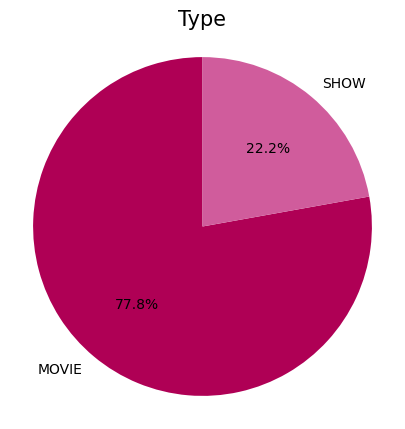

In [24]:
# plot pie chart
plt.figure(figsize=(8, 5))
plt.title('Type', fontsize=15)
plt.pie(df_titles['type'].value_counts(), 
        labels=df_titles['type'].value_counts().keys(),
        textprops={"fontsize":10},
        radius=1.1, startangle=90,
        colors=['#af0055', '#D05C9C'],
        autopct='%.1f%%')
plt.show()

Như vậy, movie chiếm đến 77.8% trong bảng dữ liệu và show chỉ chiếm 22.2%.

#### <p style="text-align: center;">**2.8.3 - Release year:**</p>  
Release year chỉ năm phát hành của bộ phim/show. 

Nhóm tiến hành đếm xem có bao nhiêu phim được sản xuất ra trong các năm trải dài từ 1901 cho đến 2022. Sau đó sắp xếp lại theo thứ tự tăng dần.

In [25]:
num_of_movies_by_year = df_titles['release_year'].value_counts().sort_index()
num_of_movies_by_year

1901       1
1902       2
1903       1
1904       1
1906       2
        ... 
2018    1597
2019    1837
2020    1767
2021    1901
2022     522
Name: release_year, Length: 116, dtype: int64

Thực hiện trực quan các dữ liệu đếm được lên biểu đồ:

<AxesSubplot:>

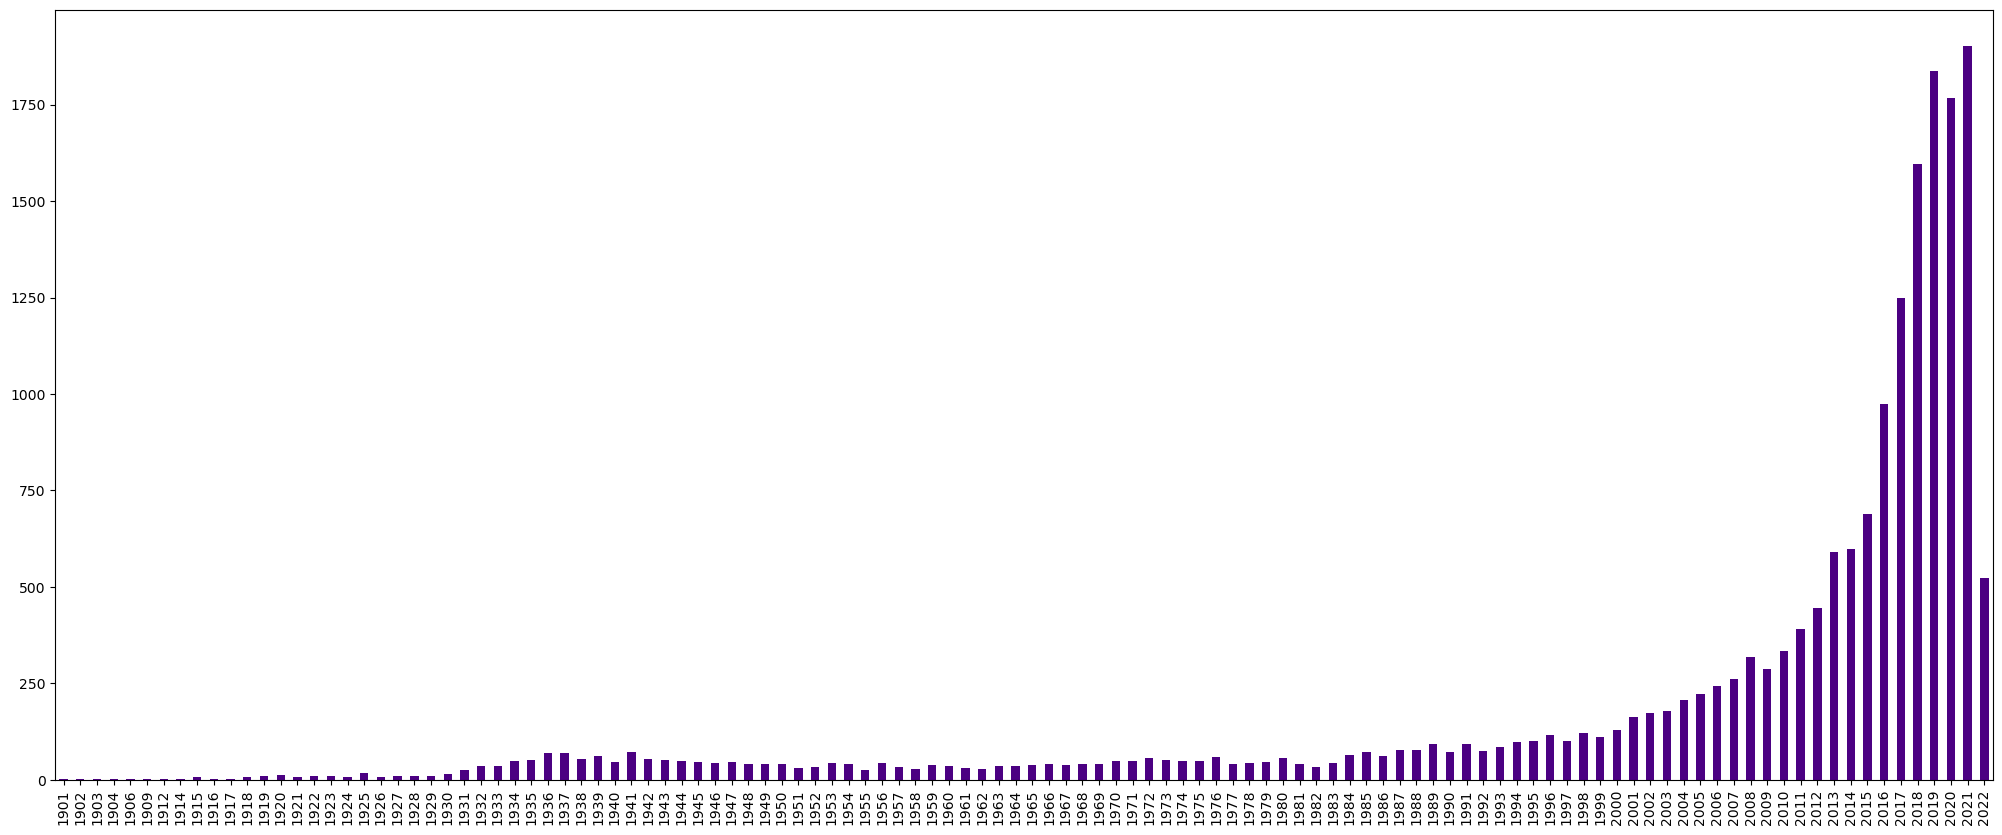

In [26]:
# plot barchart
num_of_movies_by_year.plot.bar(figsize=(25, 10), color='indigo')

Ta có thể thấy số phim tăng dần qua các năm nhưng năm 2022 lại giảm cực mạnh. Có lẽ lý do là vì nền phim ảnh đang trong thời kì phục hồi lại sau covid và trước đó các bộ phim trong quá trình quay bị hoãn do dịch.

#### <p style="text-align: center;">**2.8.4 - Age certification:**</p>  

Age certification là thuộc tính phân loại độ tuổi (kiểm duyệt và phân loại phim). Một bộ phim thường được gắn nhãn độ tuổi nhằm đảm bảo tựa đề, nội dung và tính chất của phim đúng với đối tượng xem.

Đầu tiên, nhóm sẽ gắn nhãn NONE đối với những phim chưa được gắn nhãn độ tuổi. Sau đó thực hiện việc đếm xem có bao nhiêu phim ứng với từng nhãn độ tuổi.

---
**TIỀN XỬ LÝ DỮ LIỆU:** GẮN NHÃN NONE CHO PHIM KHÔNG PHÂN LOẠI ĐỘ TUỔI

In [27]:
df_titles['age_certification'].fillna('NONE', inplace=True)
df_titles['age_certification'].value_counts()

NONE     10296
R         2400
PG-13     1508
TV-MA     1411
PG        1122
TV-14      804
G          475
TV-PG      360
TV-Y7      213
TV-Y       200
TV-G       156
NC-17       35
Name: age_certification, dtype: int64

Tiến hành trực quan hóa các nhãn lên biểu đồ tròn để xem tỷ trọng của nhãn chiếm bao nhiêu phần trăm:

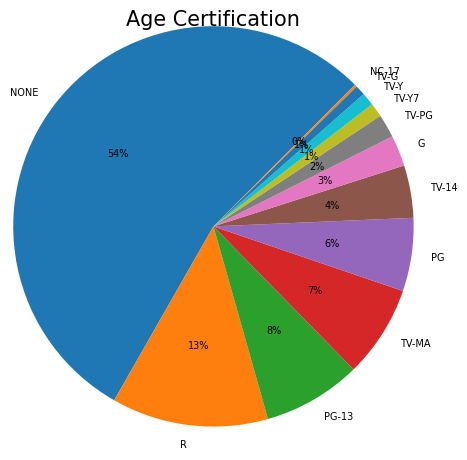

In [28]:
# pie chart
plt.figure(figsize=(5, 5))
plt.title('Age Certification', fontsize=15)
plt.pie(df_titles['age_certification'].value_counts(), 
        labels=df_titles['age_certification'].value_counts().keys(),
        textprops={"fontsize":7},
        radius=1.3, startangle=45,
        autopct='%.0f%%')
plt.show()

Như vậy dễ dàng thấy trên biểu đồ thì những phim không gắn nhãn chiếm tỷ trọng nhiều nhất (54%), tiếp theo là R (13%) và PG-13 (8%). 

#### <p style="text-align: center;">**2.8.5 - Production countries:**</p>  
Production countries là thuộc tính cho biết quốc gia sản xuất của phim. Một bộ phim không hẳn luôn luôn đến từ một quốc gia mà có thể nhiều quốc gia cùng sản xuất nên dữ liệu mới lưu dưới dạng mảng.

Đầu tiên, nhóm tiến hành rã các dấu chỉ mảng ra để nhìn dễ hơn:

In [29]:
df_titles['production_countries'] = df_titles['production_countries'].str.replace('[', '', regex=True)\
                                    .str.replace("'", '', regex=True)\
                                    .str.replace(']', '', regex=True)

Nhóm sẽ lần lượt lấy ra top 10 quốc gia tham gia sản xuất nhiều bộ phim nhất trong bộ dữ liệu, tổng số lượng quốc gia sản xuất phim.

Bên cạnh đó, nhóm sẽ thêm 1 cột dữ liệu `main_production_countries` vào DataFrame để thống nhất 1 quốc gia chính sản xuất bộ phim thay vì là 1 mảng như ban đầu.

In [30]:
# Đếm số lượng bộ phim mà từng quốc gia sản xuất, bỏ đi các giá trị null
top_production_countries = df_titles['production_countries'].str.split(', ').explode().value_counts().drop('')

# Lấy số lượng quốc gia tham gia sản xuất phim
num_production_countries = df_titles['production_countries'].str.split(',').explode().nunique()

# Thêm 1 cột dữ liệu main_production_countries vào DataFrame
df_titles['main_production_countries'] = df_titles['production_countries'].str.split(',').str[0]

In [31]:
print(f'Số lượng quốc gia tham gia sản xuất phim là: {num_production_countries}')

Số lượng quốc gia tham gia sản xuất phim là: 242


Trực quan top 10 quốc gia sản xuất nhiều bộ phim nhất

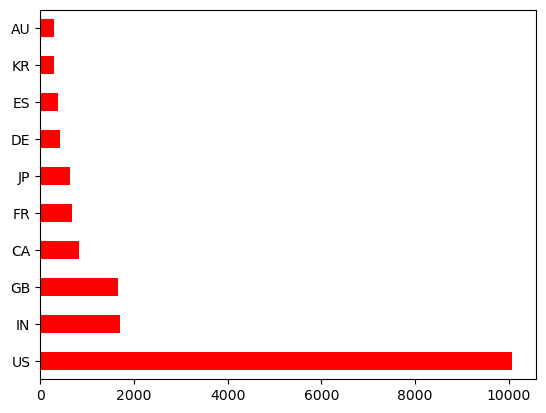

In [32]:
top_production_countries.nlargest(n=10).plot.barh(color='red');

#### <p style="text-align: center;">**2.8.6 - Genres:**</p>  
Genres là thuộc tính cho biết thể loại của phim/show là gì. 

Một bộ phim có nhiều loại khác nhau nên dữ liệu lưu thuộc tính này dưới dạng một mảng. Vậy, nhóm tiến hành tìm rã các dấu mảng trong bảng dữ liệu ra:

In [33]:
df_titles['genres'] = df_titles['genres'].str.replace('[', '', regex=True)\
                                        .str.replace("'", '', regex=True)\
                                        .str.replace(']', '', regex=True)

Làm tương tự với quốc gia sản xuất phim, nhóm sẽ thêm 1 cột dữ liệu `main_genre` vào DataFrame để thống nhất 1 thể loại phim chính của bộ phim thay vì là 1 mảng như ban đầu.

In [34]:
top_genres = df_titles['genres'].str.split(', ').explode().value_counts().drop('')
num_genres = df_titles['genres'].str.split(', ').explode().nunique()
df_titles['main_genre'] = df_titles['genres'].str.split(', ').str[0]

In [35]:
print(f'Tổng số lượng thể loại của các bộ phim là: {num_genres}')

Tổng số lượng thể loại của các bộ phim là: 20


Vì chỉ có 20 thể loại phim nên nhóm sẽ trực quan % mỗi thể loại phim trên tổng số lượng bằng biểu đồ tròn

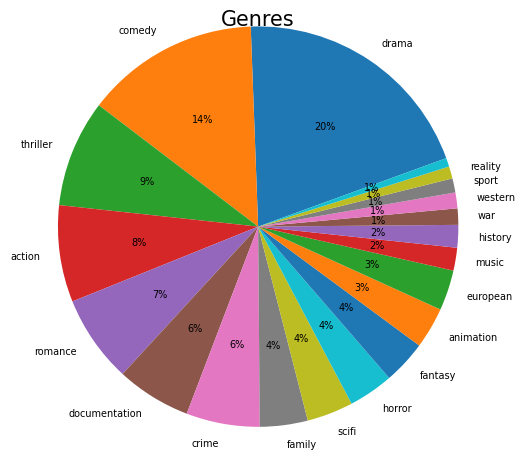

In [36]:
# pie chart
plt.figure(figsize=(5, 5))
plt.title('Genres', fontsize=15)
plt.pie(df_titles['genres'].str.split(', ').explode().value_counts(), 
        labels=df_titles['genres'].str.split(', ').explode().value_counts().keys(),
        textprops={"fontsize":7},
        radius=1.3, startangle=20,
        autopct='%.0f%%')
plt.show()

Nhận xét: 3 thể loại chiếm % cao nhất là drama, comedy và thriller (phim giật gân). Từ đó chúng ta có thể nhận thấy, các bộ phim mang thể loại kịch tính, hài hoặc giật gân đang là trend trong các bộ phim của các nền tảng xem phim online

#### <p style="text-align: center;">**2.8.7 - Seasons:**</p>  
Seasons cho biết số mùa của phim/show truyền hình. 

Đầu tiên, vì số mùa không thể mang giá trị là NaN nên nhóm tiến hành đưa nó về 0 tương ứng với cách giải thích bộ phim/show đó không có mùa nào.

---
**TIỀN XỬ LÝ DỮ LIỆU**: FILL 0 VÀO SEASONS

In [37]:
df_titles['seasons'] = df_titles['seasons'].fillna(0)

In [38]:
df_titles.set_index('title')

,id,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,main_production_countries,main_genre
title,,,,,,,,,,,,,,,
The Three Stooges,ts20945,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy
The General,tm19248,MOVIE,1926,NONE,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0,US,action
The Best Years of Our Lives,tm82253,MOVIE,1946,NONE,171,"romance, war, drama",US,0.0,tt0036868,8.1,63026.0,8.435,7.8,US,romance
His Girl Friday,tm83884,MOVIE,1940,NONE,92,"comedy, drama, romance",US,0.0,tt0032599,7.8,57835.0,11.270,7.4,US,comedy
In a Lonely Place,tm56584,MOVIE,1950,NONE,94,"thriller, drama, romance",US,0.0,tt0042593,7.9,30924.0,8.273,7.6,US,thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fine Wine,tm1014599,MOVIE,2021,NONE,100,"romance, drama",NG,0.0,tt13857480,6.8,45.0,1.466,NaN,NG,romance
C/O Kaadhal,tm898842,MOVIE,2021,NONE,134,drama,,0.0,tt11803618,7.7,348.0,NaN,NaN,,drama
Lokillo,tm1059008,MOVIE,2021,NONE,90,comedy,CO,0.0,tt14585902,3.8,68.0,26.005,6.3,CO,comedy


In [39]:
# dummies = pd.get_dummies(df_titles[['type']])
# dummies

In [40]:
%store df_titles

Stored 'df_titles' (DataFrame)


---
HẾT GIAI ĐOẠN 2